### Importing Necessary Libraries

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
tweets_data = pd.read_csv('Elon_musk.csv')
del tweets_data['Unnamed: 0']
tweets_data

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


### Data Cleaning

In [3]:
import neattext.functions as ntxt

In [4]:
stop_words = pd.read_csv('stop.txt',sep = '\t')
stop_words

,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [5]:
def clean(text):
    text = ntxt.remove_userhandles(text)
    text = re.sub('@[A-Za-z0-9]+','',str(text))
    text = re.sub(r"http\S+",'', str(text))
    text = text.lower()
    text = ntxt.remove_emojis(text)
    text = ntxt.remove_hashtags(text)
    text = ntxt.remove_html_tags(text)
    text = ntxt.remove_multiple_spaces(text)
    text = ntxt.remove_special_characters(text)
    text = ntxt.remove_urls(text)
    text = ntxt.remove_puncts(text)
    text = ntxt.remove_hashtags(text)
    text = ntxt.remove_stopwords(text)
    text = ntxt.remove_custom_words(text,'rt')
    
    
    return text
tweets_data['Text_cleaned'] = tweets_data['Text'].apply(clean)

In [6]:
tweets_data

,Text,Text_cleaned
0,@kunalb11 I�m an alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amazing execution ...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",true sounds surreal negative propaganda amp ea...
1995,@PPathole Make sure to read ur terms &amp; con...,sure read ur terms amp conditions clicking accept
1996,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber


### Sentiment analysis

In [12]:
def do_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
        
    result = {'polarity':polarity,
              'subjectivity':subjectivity,
              'sentiment':sentiment}
    return result

In [13]:
tweets_data.Text_cleaned[3]

'doge underestimated'

In [14]:
do_sentiment(tweets_data.Text_cleaned[0])

{'polarity': -0.25, 'subjectivity': 0.75, 'sentiment': 'Negative'}

In [15]:
tweets_data['sentiment_analysed'] = tweets_data['Text_cleaned'].apply(do_sentiment)

In [16]:
tweets_data = tweets_data.join(pd.json_normalize(tweets_data['sentiment_analysed']))
tweets_data

,Text,Text_cleaned,sentiment_analysed,polarity,subjectivity,sentiment
0,@kunalb11 I�m an alien,im alien,"{'polarity': -0.25, 'subjectivity': 0.75, 'sen...",-0.250000,0.750000,Negative
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing cyberpunk hdr nextlevel tried,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
2,@joerogan @Spotify Great interview!,great interview,"{'polarity': 0.8, 'subjectivity': 0.75, 'senti...",0.800000,0.750000,Positive
3,@gtera27 Doge is underestimated,doge underestimated,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amazing execution ...,"{'polarity': 0.6000000000000001, 'subjectivity...",0.600000,0.900000,Positive
...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",true sounds surreal negative propaganda amp ea...,"{'polarity': 0.1111111111111111, 'subjectivity...",0.111111,0.508333,Positive
1995,@PPathole Make sure to read ur terms &amp; con...,sure read ur terms amp conditions clicking accept,"{'polarity': 0.5, 'subjectivity': 0.8888888888...",0.500000,0.888889,Positive
1996,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber,"{'polarity': -0.375, 'subjectivity': 0.5, 'sen...",-0.375000,0.500000,Negative


### Visualizing output

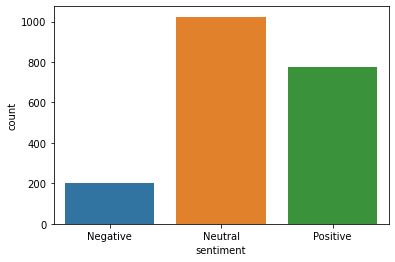

In [17]:
sns.countplot(tweets_data.sentiment)
plt.show()

In [18]:
positive_tweeks = tweets_data[tweets_data['sentiment'] == 'Positive']['Text_cleaned'].tolist()
positive_token = [token for word in positive_tweeks for token in word.split()]
negative_tweeks = tweets_data[tweets_data['sentiment'] == 'Negative']['Text_cleaned'].tolist()
negative_token = [token for word in negative_tweeks for token in word.split()]
neutral_tweeks = tweets_data[tweets_data['sentiment'] == 'Neutral']['Text_cleaned'].tolist()
neutral_token = [token for word in neutral_tweeks for token in word.split()]

In [19]:
def get_frequent_item(doc,n=20):
    tokens = Counter(doc)
    frequent_words = tokens.most_common(n)
    items = dict(frequent_words)
    return items

In [20]:
frequent_positive = get_frequent_item(positive_token)
frequent_negative = get_frequent_item(negative_token)
frequent_neutral = get_frequent_item(neutral_token)

In [33]:
df_1 = pd.DataFrame(frequent_positive.items(),columns=['pos_words','pos_count'])
df_2 = pd.DataFrame(frequent_negative.items(),columns=['neg_words','neg_count'])
df_3 = pd.DataFrame(frequent_neutral.items(),columns=['neu_words','neu_count'])
df = pd.concat([df_1,df_2,df_3],axis=1)
df

,pos_words,pos_count,neg_words,neg_count,neu_words,neu_count
0,amp,111,amp,33,amp,74
1,great,73,tesla,13,yes,65
2,haha,54,long,11,tesla,36
3,good,49,hard,11,launch,32
4,tesla,46,people,9,yeah,28
5,sure,41,little,9,like,24
6,true,34,bad,8,probably,19
7,new,31,slow,8,year,17
8,high,28,space,7,earth,16
9,best,24,small,7,falcon,16


### Barplot most frequent words

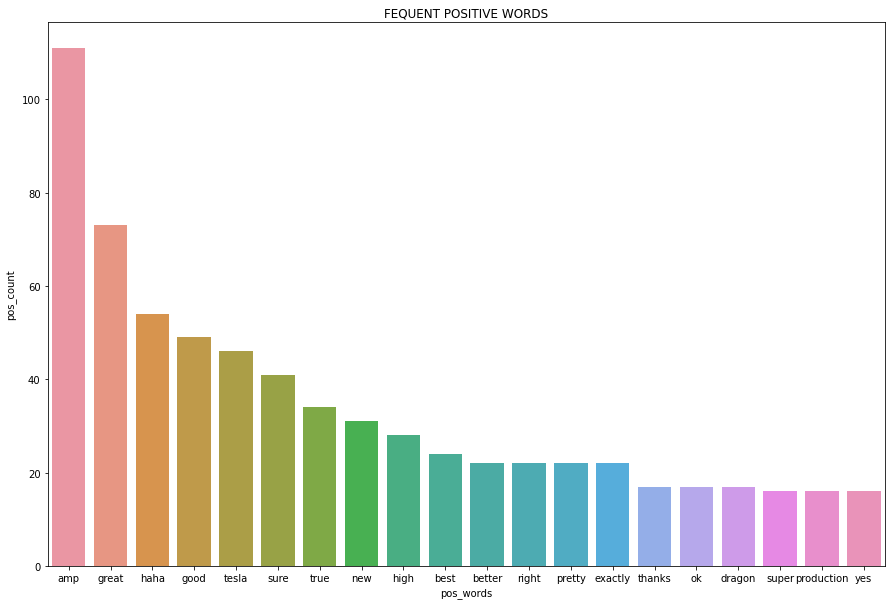

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(df.pos_words,df.pos_count)
plt.title('FEQUENT POSITIVE WORDS')
plt.show()

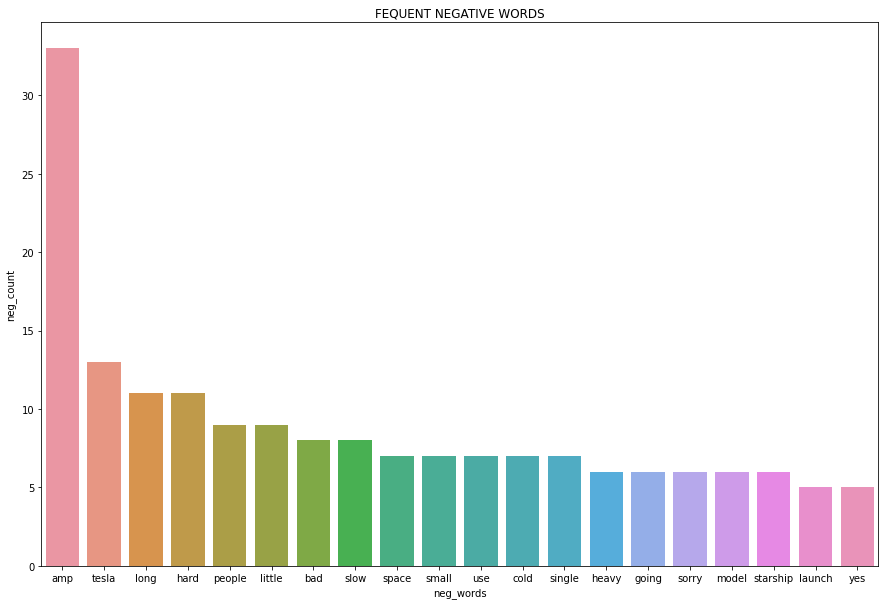

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(df.neg_words,df.neg_count,)
plt.title('FEQUENT NEGATIVE WORDS')
plt.show()

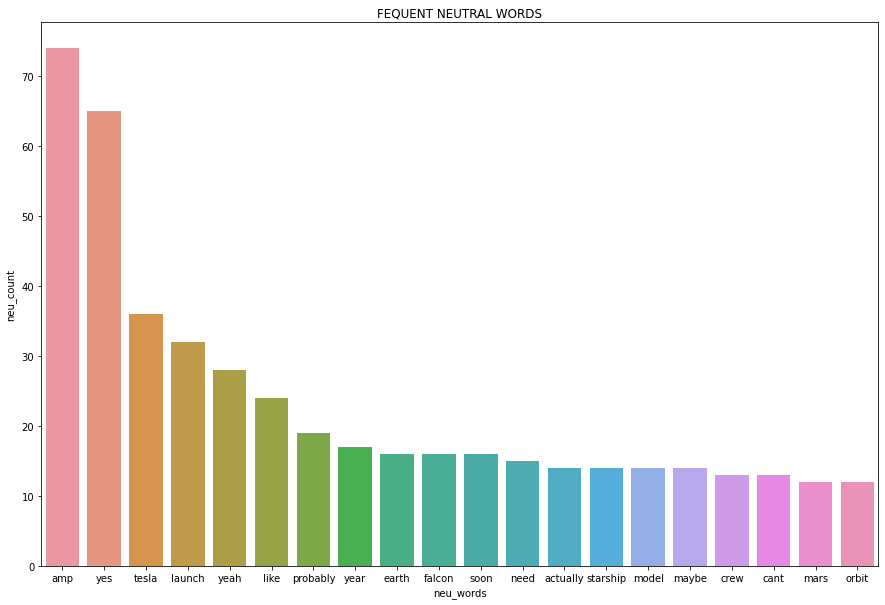

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(df.neu_words,df.neu_count)
plt.title('FEQUENT NEUTRAL WORDS')
plt.show()

### Visualizing most frequent words in Wordcloud

In [28]:
wc_plot = WordCloud()

In [29]:
positive_ = ' '.join(positive_token)
negative_ = ' '.join(negative_token)
neutral_  = ' '.join(neutral_token)

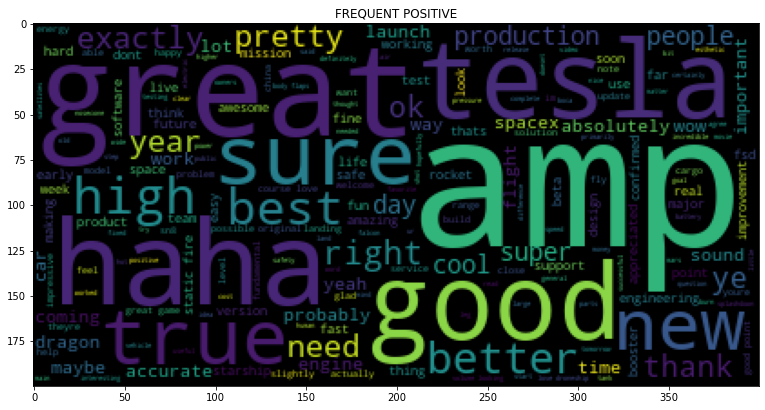

In [30]:
plt.figure(figsize=(13,10))
plt.imshow(wc_plot.generate(positive_))
plt.title('FREQUENT POSITIVE')
plt.show()

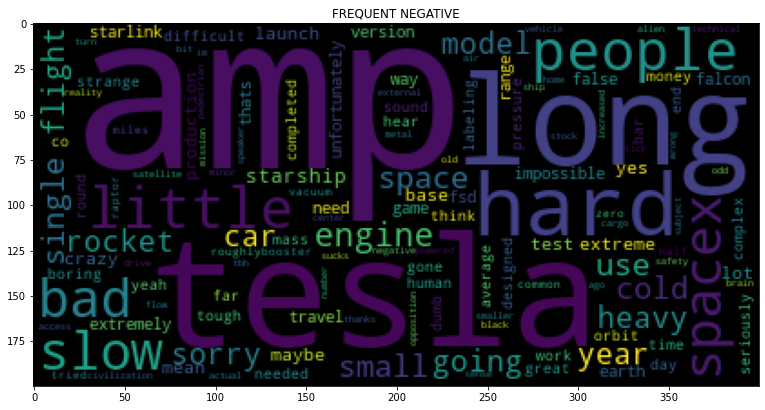

In [31]:
plt.figure(figsize=(13,10))
plt.imshow(wc_plot.generate(negative_))
plt.title('FREQUENT NEGATIVE')
plt.show()

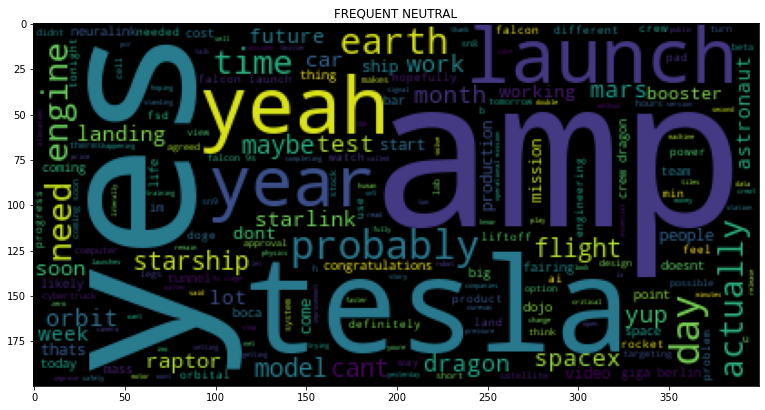

In [32]:
plt.figure(figsize=(13,10))
plt.imshow(wc_plot.generate(neutral_))
plt.title('FREQUENT NEUTRAL')
plt.show()